$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
 \newcommand\numberthis{\addtocounter{equation}{1}\tag{\theequation}}
$

### ITCS 8010: Machine Learning with Graphs and Large Networks (Fall 2020)

# Problem Set 1
<font color="blue"> Abdullah Al Raqibul Islam </font>

The purpose of these exercises is getting used to with the network analysis and the `NetworkX` software [[3]](https://networkx.github.io/documentation/stable/). For this homework, I installed the `NetworkX` network analysis package. The details about the installation of `NetworkX` can be found in [[4]](https://networkx.github.io/documentation/stable/install.html).

Here is the software packages I used in this assignment:
* Python 3.7.6
* NetworkX 2.5
* Numpy
* Matplotlib

## 1. Analyzing the Wikipedia voters network [9 points]

Wikipedia is a `directed network`. Formally, we consider the Wikipedia network as a directed graph $G = (V, E)$, with node set $V$ and edge set $E ⊂ V × V$ where (edges are ordered pairs of nodes). An edge $(a, b) ∈ E$ means that user $a$ voted on user $b$. Here is the basic properties of the Wiki-Vote graph:

* Directed graph (each unordered pair of nodes is saved once)
* Wikipedia voting on promotion to administratorship (till January 2008). Directed edge A->B means user A voted on B becoming Wikipedia administrator.
* Number of Nodes: 7115
* Number of Edges: 103689

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections as collec
%matplotlib inline

Reading `Wiki-Vote` graph.

In [2]:
G_wiki = nx.read_edgelist("data/Wiki-Vote.txt", nodetype=int, comments='#', create_using=nx.DiGraph)

1. The number of nodes in the network

In [3]:
nx.number_of_nodes(G_wiki)

7115

2. The number of nodes with a self-edge (self-loop), i.e., the number of nodes a ∈ V where (a, a) ∈ E.

In [4]:
len(list(nx.nodes_with_selfloops(G_wiki)))

0

3. The number of directed edges in the network, i.e., the number of ordered pairs (a,b) ∈ E for which a!=b.

In [5]:
num_edges = nx.number_of_edges(G_wiki)
self_loops = len(list(nx.nodes_with_selfloops(G_wiki)))
num_dir_edges = num_edges - self_loops
print(num_dir_edges)

103689


4. The number of undirected edges in the network, i.e., the number of unique unordered pairs (a,b), a!=b, for which (a,b) ∈ E or (b, a) ∈ E (or both). If both (a, b) and (b, a) are edges, this counts a single undirected edge.

In [6]:
num_edges = nx.number_of_edges(G_wiki)
num_edges_undir = nx.number_of_edges(G_wiki.to_undirected(True))

num_edges_recip = num_edges - num_edges_undir
print(num_edges_recip)

100762


5. The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes (a,b), a!=b, for which (a,b) ∈ E and (b,a) ∈ E.

In [7]:
nx.number_of_edges(G_wiki.to_undirected(True))
#G_wiki.to_undirected(True).size()

2927

In [8]:
nx.reciprocity(G_wiki)
#nx.overall_reciprocity(G_wiki)

0.0564572905515532

6. The number of nodes of zero out-degree.

In [9]:
val = len([d for n, d in G_wiki.out_degree() if d == 0])
print("The number of nodes of zero out-degree:", val)

The number of nodes of zero out-degree: 1005


7. The number of nodes of zero in-degree.

In [10]:
val = len([d for n, d in G_wiki.in_degree() if d == 0])
print("The number of nodes of zero in-degree:", val)

The number of nodes of zero in-degree: 4734


8. The number of nodes with more than 10 outgoing edges(out-degree > 10).

In [11]:
val = len([d for n, d in G_wiki.out_degree() if d > 10])
print("The number of nodes with more than 10 outgoing edges:", val)

The number of nodes with more than 10 outgoing edges: 1612


9. The number of nodes with fewer than 10 incoming edges(in-degree < 10).

In [12]:
val = len([d for n, d in G_wiki.in_degree() if d < 10])
print("The number of nodes with fewer than 10 incoming edges:", val)

The number of nodes with fewer than 10 incoming edges: 5165


## 2. Further Analyzing the Wikipedia voters network [6 points]

For this problem, we use the Wikipedia voters network.

1. Plot the distribution of out-degrees of nodes in the network on a log-log scale. Each data point is a pair (x,y) where x is a positive integer and y is the number of nodes in the network with out- degree equal to x. Restrict the range of x between the minimum and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log scale, use base 10 for both x and y axes.

For this problem, I plotted both in- and out-degree distributuion in the following scales:
1. Log-Log Scale
2. Normal Scale

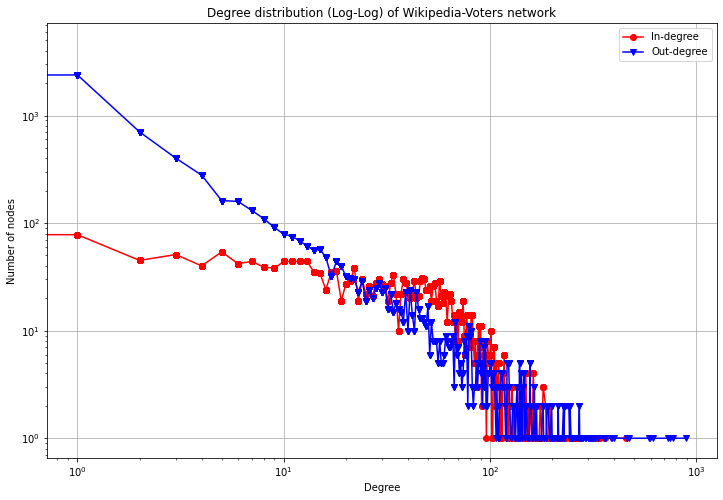

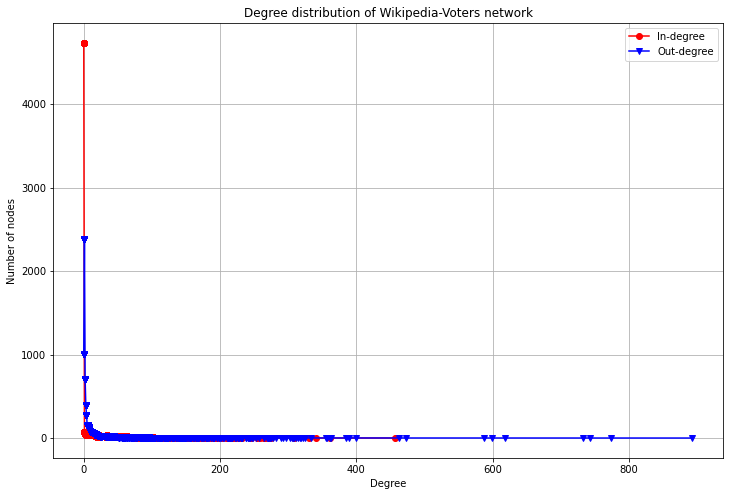

In [13]:
# Calculate in degrees of a directed graph
in_degrees = G_wiki.in_degree() # dictionary node:degree
in_values = sorted([d for n, d in in_degrees])
in_hist = [in_values.count(x) for x in in_values]

# Calculate out degrees of a directed graph
out_degrees = G_wiki.out_degree() # dictionary node:degree
out_values = sorted([d for n, d in out_degrees])
out_hist = [out_values.count(x) for x in out_values]

# log-log ploting the degree distribution
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.loglog(in_values, in_hist, 'ro-') # in-degree
plt.loglog(out_values, out_hist, 'bv-') # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution (Log-Log) of Wikipedia-Voters network')
plt.show()

# regular ploting the degree distribution
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.plot(in_values, in_hist, 'ro-') # in-degree
plt.plot(out_values, out_hist, 'bv-') # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution of Wikipedia-Voters network')
plt.show()

## 3. Finding Experts on the Java Programming Language on StackOverflow [5 points]

Download the StackOverflow network [stackoverflow-Java.txt.gz](http://snap.stanford.edu/class/cs224w-data/hw0/stackoverflow-Java.txt.gz). An edge $(a,b)$ in the network means that person $a$ endorsed an answer from person $b$ on a Java-related question.

Using NetworkX [[3]]() I first load the StackOverflow network and done the following computation:
1. The number of weakly connected components in the network. This value can be calculated in NetworkX via function weakly_connected_components.
2. The number of edges and the number of nodes in the largest weakly connected component. The largest weakly connected component is calculated via function call in NetworkX

Note that StackOverflow is a `directed network`.

In [14]:
G_stack = nx.read_edgelist("data/stackoverflow-Java.txt", nodetype=int, comments='#', create_using=nx.DiGraph)

nx.number_of_nodes(G_stack)

146874

1. The number of weakly connected components in the network. This value can be calculated in NetworkX via function `weakly_connected_components`.

In [15]:
nx.number_weakly_connected_components(G_stack)

10143

2. The number of edges and the number of nodes in the largest weakly connected component. The largest weakly connected component is calculated via function call in NetworkX

In [16]:
largest_cc = max(nx.weakly_connected_components(G_stack), key=len)
#print(len(largest_cc))
sub = G_stack.subgraph(largest_cc)

print('number of nodes in the largest weakly connected component: ' + str(nx.number_of_nodes(sub)))
print('number of edges in the largest weakly connected component: ' + str(nx.number_of_edges(sub)))

number of nodes in the largest weakly connected component: 131188
number of edges in the largest weakly connected component: 322486


## 4. Network Characteristics [40 points]:

One of the goals of network analysis is to find mathematical models that characterize real-world networks and that can then be used to generate new networks with similar properties. In this problem, we will explore two famous models—Erdos-Renyi [[1]]() and Small World [[2]]()—and compare them to real-world data from an academic collaboration network. Note that in this problem all networks are `undirected`.

To solve this problem, I introduce a general `Graph` class from [[5]](). It contains the general graph properties and functions necessary for this project. I implemented `diameter` function on my own and used NetworkX's [[3]]() implementation for estimating the average clustering coefficient of a graph. To handle duplicate edges while generating the graph, I used a separate `adjacency matrix` to check the edge existance on $O(1)$. This can be further replaced by implementing a function within the `Graph` class. I kept this outside of this project scope.

1. **Erdos-Renyi Random graph (G(n, m) random network):** I generated a random instance of this model by using $n = 5242$ nodes and picking $m = 14484$ edges at random.

2. **Small-World Random Network:** I generated an instance from this model as follows:
    * Begin with n = 5242 nodes arranged as a ring, i.e., imagine the nodes form a circle and each node is connected to its two direct neighbors (e.g., node 399 is connected to nodes 398 and 400), giving us 5242 edges.
    * Next, connect each node to the neighbors of its neighbors (e.g., node 399 is also connected to nodes 397 and 401). This gives us another 5242 edges.
    * Finally, randomly select 4000 pairs of nodes not yet connected and add an edge between them.
    * In total, this will make m = 5242 · 2 + 4000 = 14484 edges.

For both of the graphs, I calculated the common network properties (i.e. degree distribution, diameter, clustering coefficient, etc.) and make comparison with the NetworkX [[3]]() implementation. Here is the short description of my implementation for finding common network properties:

1. **Diameter:** Diameter is the longest shortest path in the network. I calculate all possible shortest path and then get the largest number from them.
2. **Clustering coefficient:** Clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together [[9]](). I used random walk triangle counting algorithm to find clustering coefficient in a network.
3. **Degree distribution:** I used separate $1-D$ array to keep track of degrees per vertex. Then I used $matplotlib.pyplot$ to plot the distribution in Log-Log scale.

As just mentioned, to compare the correctness of my implementation for these networks, I used NetworkX's [[3]]() graph constructors. From NetworkX [[3]](), I used $G_{n,p}$ [[6]]() and $G_{n,m}$ [[8]]() models to compare with my implementation of Erdos-Renyi Random graph. I make comparison w.r.t. both $G_{n,p}$ [[6]]() and $G_{n,m}$ [[8]]() models because $G_{n,p}$ [[6]]() model does not give garuntee of fixed number of edges$-$which is one of the key property in my model. On the other hand, $G_{n,m}$ [[8]]() model does give the garuntee of fixed number of edges, but it is not listed as Erdos-Renyi Random graph in the NetworkX [[3]](). For comparing Small-World Random Network I used the $newman-watts-strogatz$ graph model from [[7]]() as the counterpart.

### General Purpose Graph Functions

This subsection contains a couple of support function to calculate and visualize common network properties (i.e. degree distribution, diameter, clustering coefficient, etc.). All this functions works on either an adjacency matrix or on 1-D array.

In [2]:
"""
    Print adjacency-matrix

    attributes
    ==========
    mat             2-D adjacency matrix
"""

def print_adj_matrix(mat):
    for row in mat:
        print(row)
    print("-----------------------")

In [3]:
# function to run bfs algorithm

"""
    Run bfs algorithm on a graph (stored in adjacency matrix)

    attributes
    ==========
    s               source vertex
    mat             2-D adjacency matrix
"""

def bfs(s, mat):
    # mark all the vertices as not visited
    visited = [False] * (len(mat))
    dist = [-1 for i in range(len(mat))]

    # queue for bfs
    queue = []

    # mark the source node and insert into queue
    queue.append(s)
    visited[s] = True
    dist[s] = 0

    while queue:
        u = queue.pop(0)

        v = 0
        while(v < len(mat[u])):
            if mat[u][v] and visited[v] == False:
                queue.append(v)
                visited[v] = True
                dist[v] = dist[u] + 1
            v = v + 1
    return dist

In [4]:
# function to calculate diameter of a graph

"""
    Calculate diameter of a graph (stored in adjacency matrix)

    attributes
    ==========
    mat             2-D adjacency matrix
"""

def get_diameter(mat):
    diameter = -1
    i = 0
    while (i < len(mat)):
        dist = bfs(i, mat)
        j = 0
        while(j < len(dist)):
            diameter = max(diameter, dist[j])
            j = j + 1
        i = i + 1
    
    return diameter

In [5]:
"""
    Calculate clustering coefficient of a graph (stored in adjacency matrix)

    attributes
    ==========
    mat             2-D adjacency matrix
    trials          number of random walk (default: 1000)
"""

def average_clustering(mat, trials=1000):
    triangles = 0
    nodes = len(mat)
    # print("# of nodes: ", nodes)
    for i in range(trials):
        w = randrange(nodes)
        nbrs = []
        i = 0
        while(i < len(mat[w])):
            if mat[w][i]:
                nbrs.append(i)
            i = i + 1
            
        if len(nbrs) < 2:
            continue
        u, v = random.sample(nbrs, 2)
        if mat[v][u]:
            triangles += 1
    return triangles / float(trials)

In [6]:
"""
    Plot degree distribution of a graph

    attributes
    ==========
    degree          1-D array;
                    containing the degree count for each vertex
"""

def degree_distribution_plotting(degree):
    degree = sorted([d for d in degree])
    degree_hist = [degree.count(x) for x in degree]

    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.loglog(degree, degree_hist, 'bv-') # out-degree
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('Degree distribution (Log-Log) of Wikipedia-Voters network')
    plt.show()

### General Purpose Graph Structures

In [7]:
class Vertex:
    """
        Class for a single vertex
        
        Attributes
        ==========
        key             vertex-id
        neighbors       adjacency list;
                        contains edges from key
    """
    
    def __init__(self, key):
        self.key = key
        self.neighbors = {}

    def add_neighbor(self, neighbor, weight=None):
        self.neighbors[neighbor] = weight

    def __str__(self):
        return '{} neighbors: {}'.format(
            self.key,
            [x.key for x in self.neighbors]
        )

    def get_connections(self):
        return self.neighbors.keys()

    def get_weight(self, neighbor):
        return self.neighbors[neighbor]

In [8]:
class Graph:
    """
        Class for storing the whole graph
        
        Attributes
        ==========
        vertices        1-D array containing vertex-ids
    """
    
    def __init__(self):
        self.vertices = {}
    
    def __init__(self, max_vertices):
        self.vertices = {}
        for i in range(max_vertices):
            self.add_vertex(Vertex(i))

    def add_vertex(self, vertex):
        self.vertices[vertex.key] = vertex

    def get_vertex(self, key):
        if key in self.vertices[key]:
            return self.vertices[key]
        else:
            return None

    def __contains__(self, key):
        """
        Overload the in operator to support:
          >>> g = Graph()
          >>> g.add_vertex(Vertex(42))
          >>> 42 in g
          True
        """
        return key in self.vertices

    def add_edge(self, from_key, to_key, weight=None):
        if from_key not in self.vertices:
            self.add_vertex(Vertex(from_key))
        if to_key not in self.vertices:
            self.add_vertex(Vertex(to_key))
        self.vertices[from_key].add_neighbor(
            self.vertices[to_key],
            weight
        )

    def get_vertices(self):
        return self.vertices.keys()

    def __iter__(self):
        return iter(self.vertices.values())
    
    # function to run bfs algorithm
    def bfs(self, s):
        # mark all the vertices as not visited
        visited = [False] * (len(self.vertices))
        dist = [-1 for i in range(len(self.vertices))]

        # queue for bfs
        queue = []

        # mark the source node and insert into queue
        queue.append(s)
        visited[s.key] = True
        dist[s.key] = 0

        while queue:
            u = queue.pop(0)

            for v in u.get_connections():
                if visited[v.key] == False:
                    queue.append(v)
                    visited[v.key] = True
                    dist[v.key] = dist[u.key] + 1
        return dist
    
    # function to calculate diameter of a graph
    def get_diameter(self):
        diameter = -1
        for u in self:
            dist = self.bfs(u)
            j = 0
            while(j < len(dist)):
                diameter = max(diameter, dist[j])
                j = j + 1

        return diameter
    
    def average_clustering(self, trials=100000): 
        """
        NetworkX implementation for clustering coefficient.
        
        Estimates the average clustering coefficient of G. 

        The local clustering of each node in `G` is the  
        fraction of triangles that actually exist over  
        all possible triangles in its neighborhood. 
        The average clustering coefficient of a graph  
        `G` is the mean of local clusterings. 

        This function finds an approximate average
        clustering coefficient for G by repeating `n`  
        times (defined in `trials`) the following 
        experiment: choose a node at random, choose  
        two of its neighbors at random, and check if 
        they are connected. The approximate coefficient  
        is the fraction of triangles found over the  
        number of trials [1]_. 

        Parameters 
        ----------
        trials : integer 
            Number of trials to perform (default 100000). 

        Returns 
        ------- 
        c : float 
            Approximated average clustering coefficient.
        """
        triangles = 0
        nodes = len(self.vertices)
        # print("# of nodes: ", nodes)
        for i in range(trials):
            w = randrange(nodes)
            nbrs = list(self.vertices[w].get_connections())
            if len(nbrs) < 2:
                continue
            u, v = random.sample(nbrs, 2)
            # print("u", u, "v", v, "w", w)
            if u in list(self.vertices[v.key].get_connections()):
                triangles += 1
        # print("triangles:", triangles, "trials: ", trials)
        return float(triangles) / float(trials)

### Erdos-Renyi Random graph

In [14]:
# graph is undirected

num_nodes = 5242
num_edges = 14484

### values for testing
# num_nodes = 10
# num_edges = 5

max_possible_edges = (num_nodes * (num_nodes - 1)) / 2
p = num_edges / max_possible_edges
print("probability p: ", p)

prob_converter = 100000
rand_th = int(p * prob_converter)
print("rand_th: ", rand_th)

probability p:  0.0010544047057723853
rand_th:  105


#### My Implementation

Constructing the instance of Erdos-Renyi model.

In [15]:
adj_mat_erdos = [ [0] * num_nodes for i in range(num_nodes)]
G_erdos_me = Graph(num_nodes)
count_edges_erdos = 0
deg_erdos = [0 for i in range(num_nodes)]

Inserting edges in the Erdos-Renyi model.

In [16]:
import random
from random import randrange

random.seed()

# print_adj_matrix()

while(count_edges_erdos < num_edges):
    i = 0
    j = i + 1
    
    while (i < len(adj_mat_erdos)):
        while(j < len(adj_mat_erdos[i])):
            if(adj_mat_erdos[i][j] == 0):
                toss = randrange(prob_converter)
                if(toss <= rand_th):
                    # print(toss, " ", i, " ", j)
                    adj_mat_erdos[i][j] = 1
                    adj_mat_erdos[j][i] = 1
                    
                    deg_erdos[i] += 1
                    deg_erdos[j] += 1
                    
                    G_erdos_me.add_edge(i, j)
                    G_erdos_me.add_edge(j, i)
                    
                    count_edges_erdos += 1
                    # print_adj_matrix()
                    
            if(count_edges_erdos == num_edges): break
            j = j + 1
            
        i = i + 1
        j = i + 1
        if(count_edges_erdos == num_edges): break

# print_adj_matrix()

In [24]:
## Note: Adjacency matrix is taking too much time to calculate diameter.
## This is one of the reasons I moved to adjacency list type structure for storing the graph.

diameter = get_diameter(adj_mat_erdos)
print("diameter: ", diameter)

In [27]:
diameter = G_erdos_me.get_diameter()
print("diameter: ", diameter)

diameter:  10


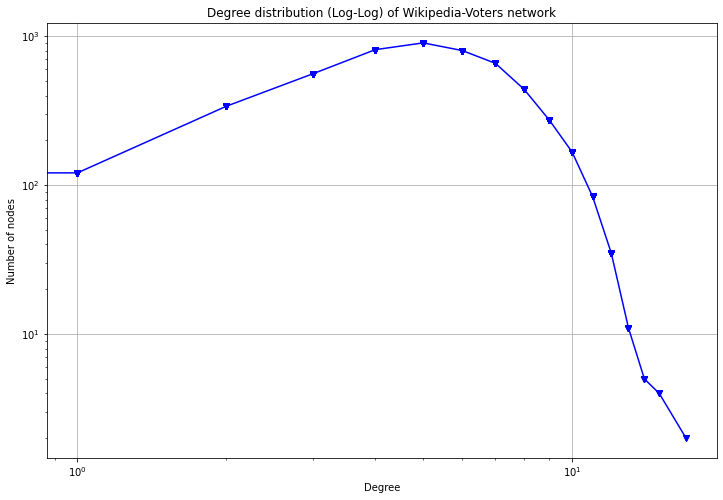

In [17]:
# print(deg)
degree_distribution_plotting(deg_erdos)

In [18]:
c_coeff = G_erdos_me.average_clustering()
print("clustering coefficient: ", c_coeff)

clustering coefficient:  0.00085


In [28]:
## Note: Adjacency matrix is taking too much time to calculate clustering coefficient.

c_coeff = average_clustering(adj_mat_erdos)
print("clustering coefficient: ", c_coeff)

clustering coefficient:  0.0


#### NetworkX Implementation: erdos_renyi_graph

In [19]:
G_erdos_nx = nx.erdos_renyi_graph(num_nodes, p)

cc = nx.average_clustering(G_erdos_nx)
print("Clustering Coefficient:", cc)
print("Number of edges:", nx.number_of_edges(G_erdos_nx))

Clustering Coefficient: 0.0010670515630454575
Number of edges: 14646


In [31]:
dia = 0

if nx.is_connected(G_erdos_nx) == False:
    for cc in nx.connected_components(G_erdos_nx):
        sub_g = G_erdos_nx.subgraph(cc)
        if len(sub_g) > 1:
            dia = max(dia, nx.diameter(sub_g))
else:
    dia = nx.diameter(G_erdos_nx)
    
print("Diameter: ", dia)

Diameter:  10


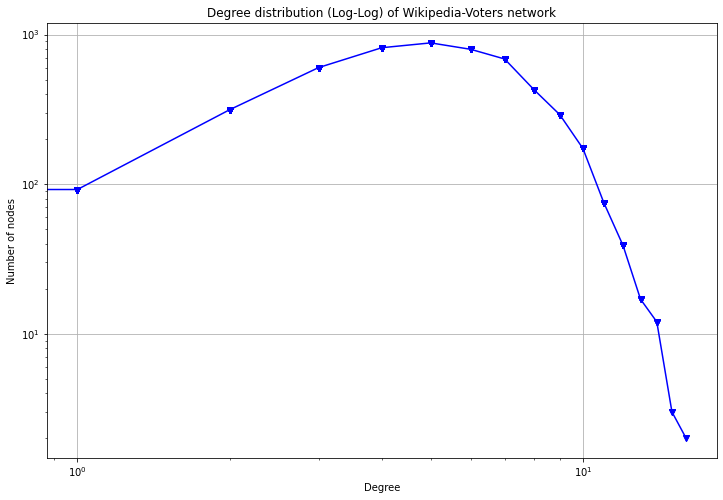

In [20]:
degree_distribution_plotting([d for n, d in G_erdos_nx.degree()])

#### NetworkX Implementation: gnm_random_graph

In [21]:
G_nm_nx = nx.gnm_random_graph(num_nodes, num_edges)

cc = nx.average_clustering(G_nm_nx)
print("Clustering Coefficient:", cc)
print("Number of edges:", nx.number_of_edges(G_nm_nx))

Clustering Coefficient: 0.0009224761418580569
Number of edges: 14484


In [23]:
dia = 0

if nx.is_connected(G_nm_nx) == False:
    for cc in nx.connected_components(G_nm_nx):
        sub_g = G_nm_nx.subgraph(cc)
        if len(sub_g) > 1:
            dia = max(dia, nx.diameter(sub_g))
else:
    dia = nx.diameter(G_nm_nx)
    
print("Diameter: ", dia)

Diameter:  10


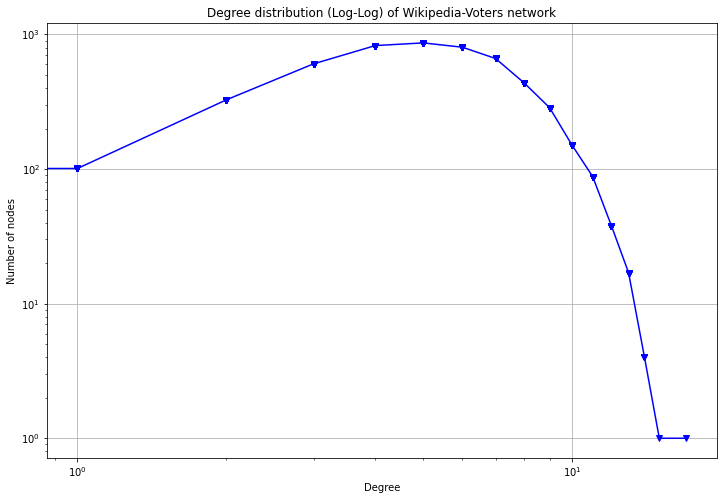

In [22]:
degree_distribution_plotting([d for n, d in G_nm_nx.degree()])

#### Comparison of Erdos-Renyi Random graph: My Implementation Vs. NetworkX

1. **Diameter:** For both of the graph models have the same diameter (i.e. $10$). This is interesting considering $G_{n,p}$ model has different number of edges but producing similar diameter in the network.
2. **Clustering coefficient:** We found a difference in clustering coefficient in between these two models. The NetworkX graph model gives $0.0009224761418580569$ as the value of clustering coefficient but from my model I found $0.00085$ ($1.08x$ lower than `NetworkX`). Although the gap is quite low, but I believe this is happened due to the different network building process. In my case, I build this network by giving edges equal probability to be selected. Different implementation$-$for example choosing nodes randomly as the endpoint of edges$-$could lead to a different result.
3. **Degree distribution:** The degree distribution shows somewhat similar behaviour for these two models.

The overall comparison is interesting$-$NetworkX Erdos-Renyi $G_{n,p}$ graph model shows similar graph properties with my implementation$-$although those models have different number of edges.

#### Comparison of Erdos-Renyi Random graph: My Implementation Vs. NetworkX
To make fair comparison with my implementation, I further implemented $G_{n,m}$ graph model from NetworkX and found it shows high similarity with my implementation.

### Small-World Random Network

#### My Implementation

In [28]:
adj_mat_sw = [ [0] * num_nodes for i in range(num_nodes)]
G_sw_me = Graph(num_nodes)
count_edges_sw = 0
deg_sw = [0 for i in range(num_nodes)]
# print(deg)

In [29]:
import random
from random import randrange

random.seed()

for u in range(num_nodes):
    v = (u + 1) % num_nodes
    adj_mat_sw[u][v] = 1
    adj_mat_sw[v][u] = 1

    deg_sw[u] += 1
    deg_sw[v] += 1

    G_sw_me.add_edge(u, v)
    G_sw_me.add_edge(v, u)

    count_edges_sw += 1

for u in range(num_nodes):
    v = (u + 2) % num_nodes
    adj_mat_sw[u][v] = 1
    adj_mat_sw[v][u] = 1

    deg_sw[u] += 1
    deg_sw[v] += 1

    G_sw_me.add_edge(u, v)
    G_sw_me.add_edge(v, u)

    count_edges_sw += 1

while(count_edges_sw < num_edges):
    u = randrange(num_nodes)
    v = randrange(num_nodes)
    
    if u != v and adj_mat_sw[u][v] == 0:
        adj_mat_sw[u][v] = 1
        adj_mat_sw[v][u] = 1

        deg_sw[u] += 1
        deg_sw[v] += 1

        G_sw_me.add_edge(u, v)
        G_sw_me.add_edge(v, u)

        count_edges_sw += 1

# print_adj_matrix()

In [35]:
diameter = G_sw_me.get_diameter()
print("diameter: ", diameter)

diameter:  10


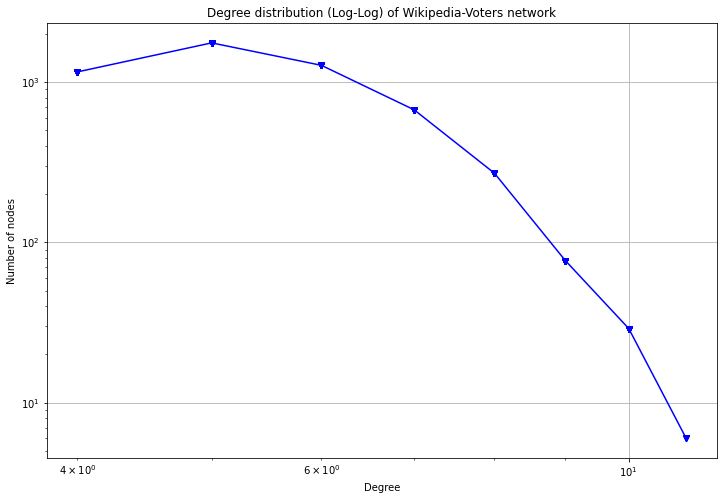

In [30]:
# print(deg)
degree_distribution_plotting(deg_sw)

In [31]:
c_coeff = G_sw_me.average_clustering()
print("clustering coefficient: ", c_coeff)

clustering coefficient:  0.28679


#### NetworkX Implementation: newman_watts_strogatz_graph

In [32]:
k = 4
on_ring_num_edges = (2 * num_nodes)
# max_possible_off_ring_edges = ((num_nodes * (num_nodes - 1)) / 2) - on_ring_num_edges
off_ring_num_edges = num_edges - on_ring_num_edges
# p = off_ring_num_edges / max_possible_off_ring_edges
p = off_ring_num_edges / on_ring_num_edges

G_sw_nx = nx.newman_watts_strogatz_graph(num_nodes, k, p)

print("number of edges:", G_sw_nx.number_of_edges())

cc = nx.average_clustering(G_sw_nx)
print("Clustering Coefficient: ", cc)

number of edges: 14459
Clustering Coefficient:  0.2783509868401089


In [39]:
dia = 0

if nx.is_connected(G_sw_nx) == False:
    for cc in nx.connected_components(G_sw_nx):
        sub_g = G_sw_nx.subgraph(cc)
        if len(sub_g) > 1:
            dia = max(dia, nx.diameter(sub_g))
else:
    dia = nx.diameter(G_sw_nx)
    
print("Diameter: ", dia)

Diameter:  10


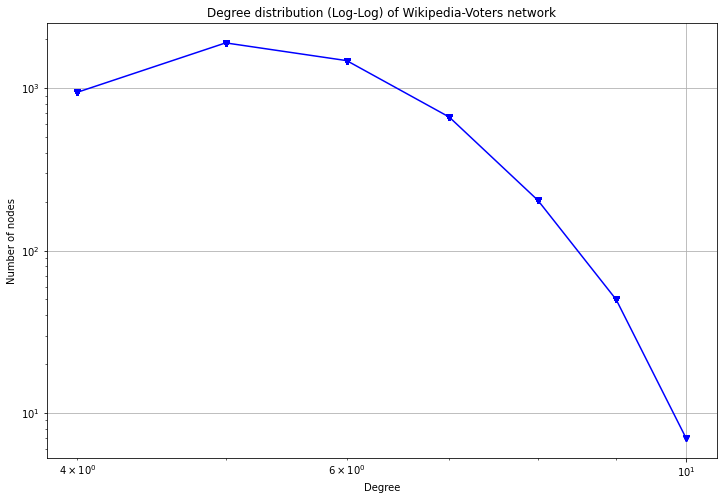

In [33]:
degree_distribution_plotting([d for n, d in G_sw_nx.degree()])

#### Comparison of Small-World Random Network: My Implementation Vs. NetworkX

1. **Diameter:** For both of the graph models have the same diameter (i.e. $10$)
2. **Clustering coefficient:** We found a very similar clustering coefficient from these two models. $0.2783509868401089$ from NetworkX Vs. $0.28679$ from my model.
3. **Degree distribution:** The degree distribution shows somewhat similar behaviour for these two models. Only noticeable deviation is an extension after $10$ in the $x-axis$ in the degree distribution of my model.

#### Overall Observation from this Experiment

More interesting observation is, although both of the `Erdos-Renyi Random graph` and `Small-World Random Network` have same number of nodes and edges, it shows **similarity** in `diameter` and **dissimilarity** in `degree distribution` and `clustering coefficient`. This is surely due to the way we build the network. And it implies the importance of the building process of different random network.

## 5. Random Graphs with Clustering [40 points]

Consider the following random graph model with clustering. For $n$ nodes, we have ${n \choose 3}$ ‘triplets’. For each triplet, with independent probability $p$ we connect the nodes belonging to this triplet in the graph using three edges to form a triangle, where $p$ = $\frac{c}{n-1 \choose 2}$.

Assume $n$ is very large.

* Question 1: Prove that the expected degree in this model is $2c$. [Hint: expected degree of a node $u$ in this generative model is equal to twice the expected number of triangles incident on $u$]
* Question 2: What is the clustering coefficient $C$? What is the value of $C$ as $n$ tends to infinity?
* Question 3: Implement this model to computationally derive degree distribution, diameter, and clustering coefficient.

### Question 1

In this problem it is given that we have $n$ nodes. So, total number of `triplets`, $tt = {n \choose 3}$. Simplifying $tt$,

$$
\begin{align*}
tt &= {n \choose 3}\\
   &= \frac{n * (n-1) * (n-2)}{3!}\\
   &= \frac{n * (n-1) * (n-2)}{6}
\end{align*}
$$

Clearly, each `triplet` contributes $3$ edges in the graph. It is also given that, for each triplet with independent probability $p$ we connect the nodes belonging to this triplet in the graph using the three contributing edges to form a triangle, where

$$
\begin{align*}
p &= \frac{c}{n-1 \choose 2}\\
   &= \frac{2 * c}{(n-1) * (n-2)}
\end{align*}
$$

As of given total number of `triplets` $tt$ and the possibility to choose a single `triplet` to be present in the graph, the actual number of `triplets` in the graph, $x$ is

$$
\begin{align*}
x &= p * tt\\
   &= \frac{2 * c}{(n-1) * (n-2)} * \frac{n * (n-1) * (n-2)}{6}\\
   &= \frac{c * n}{3}
\end{align*}
$$

Now, let's consider we have total of $e$ edges in the graph. As we already know$-$
* there are total of $x$ `triplets` in the graph
* each `triplet` contributes $3$ edges in the graph
* other than `triplets` there is no aditional edges in the graph

So, we can write $e$ as,

$$
\begin{align*}
e &= 3 * x\\
   &= 3 * \frac{c * n}{3}\\
   &= c * n
\end{align*}
$$

For undirected graph, we can calculate the `expected average degree` $d$ as,

$$
\begin{align*}
d &= \frac{2 * e}{n}\\
    &= \frac{2 * c * n}{n}\\
    &= 2 * c
\end{align*}
$$

From this, it is proved that the expected degree ($d$) in this model is $2c$.

### Question 2

* What is the clustering coefficient C?

From the previous section we get the total number of `triplets` ($tt$) and the actual number of `triplets` ($x$) in the graph. So, by using this information we can calculate the `clustering coefficient` $C$$-$

$$
\begin{align*}
C &= \frac{x}{tt}\\
   &= \frac{c * n}{3} * \frac{6}{n * (n-1) * (n-2)}\\
   &= \frac{2 * c}{(n-1) * (n-2)}
\end{align*}
$$

* What is the value of $C$ as $n$ tends to infinity?

So, we can see when $n$ tends to infinity the denominator of the above equation become infinite. Which will ultimately makes the value of $C$ tends to $0$. Bellow I have plotted the graph for $C$ varying $n$. From the figure we can clearly observe that increasing the number of nodes in the graph bring the clustering coefficient near to $0$.

**N.B.:** I was trying to put the latex equation numbers here, but was facing some issue handling that. So instead of calling by equation number, I used the variable names.

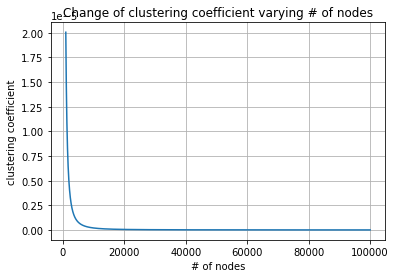

In [41]:
# Plotting of clustering coefficient varying number of nodes
c = 10
x1 = []
y1 = []

for n in np.arange(1000, 100000):
    c_coeff = (2 * c) / ((n-1) * (n-2))
    x1.append(n)
    y1.append(c_coeff)

fig, ax = plt.subplots()
ax.plot(x1, y1)

ax.set(xlabel='# of nodes', ylabel='clustering coefficient',
       title='Change of clustering coefficient varying # of nodes')
ax.grid()

# fig.savefig("test.png")
plt.show()

### Question 3

In this section, I implement this model to computationally report degree distribution, diameter, and clustering coefficient. In building the model, I considered a fixed number of nodes ($1000$ in this case) and set the constant $c=1000$. Then as the description of this problem suggests, I calculate the probability $p$ and choose the triplets randomly with $p$ probability. After building the model, I calculate the common network properties and here is the listing:

0. **Number of triplets:** 272358; **Number of edges:** 432298
1. **Diameter:** $2$; this is expected considering we build our model by choosing triplets and it would produce diamond shape clusters in the network.
2. **Clustering coefficient:** 0.86638; this number is prety high! From the formulation of clustering coefficient in $Question 2$, we know this value should be $0.002$ (approximately). The probable explanation of getting this larger number could be the randomization we used to calculate the clustering coefficient.
3. **Degree distribution:** The degree distribution of this network is quite different from what we get in `Small-World Random Network` and `Erdős–Rényi Random Graph`. This degree distribution actually supports my previous claim$-$the diamond shape clusters in the network. A larger portion of the nodes contains higher degree than the rest of the network. This also justyfies the reason of lower diameters in the network.

In [16]:
num_nodes = 1000
c = 1000
p = (2 * c) / ((num_nodes-1) * (num_nodes-2))
rand_range = 100000
rand_th = int(p * rand_range)
# print(rand_th)

In [17]:
adj_mat_triplet = [ [0] * num_nodes for i in range(num_nodes)]
G_triplet = Graph(num_nodes)
deg_triplet = [0 for i in range(num_nodes)]
num_edges = 0
num_triplet = 0

In [18]:
import random
from random import randrange

random.seed()

i = 0
j = i + 1
k = j + 1

while (i < num_nodes):
    while(j < num_nodes):
        while(k < num_nodes):
            # print("i:", i, "j:", j, "k:", k)
            if(adj_mat_triplet[i][j] == 1 
               and adj_mat_triplet[j][k] == 1 
               and adj_mat_triplet[k][i] == 1):
                k = k + 1
                continue;
            
            toss = randrange(rand_range)
            if(toss <= rand_th):
                # print("i", i, "j", j, "k", k)
                num_triplet = num_triplet + 1
                
                if adj_mat_triplet[i][j] == 0:
                    adj_mat_triplet[i][j] = 1
                    adj_mat_triplet[j][i] = 1

                    deg_triplet[i] += 1
                    deg_triplet[j] += 1

                    G_triplet.add_edge(i, j)
                    G_triplet.add_edge(j, i)

                    num_edges += 1
                    
                if adj_mat_triplet[j][k] == 0:
                    adj_mat_triplet[j][k] = 1
                    adj_mat_triplet[k][j] = 1

                    deg_triplet[j] += 1
                    deg_triplet[k] += 1

                    G_triplet.add_edge(j, k)
                    G_triplet.add_edge(k, j)

                    num_edges += 1
                
                if adj_mat_triplet[k][i] == 0:
                    adj_mat_triplet[k][i] = 1
                    adj_mat_triplet[i][k] = 1

                    deg_triplet[k] += 1
                    deg_triplet[i] += 1

                    G_triplet.add_edge(k, i)
                    G_triplet.add_edge(i, k)

                    num_edges += 1
            k = k + 1
        j = j + 1
        k = j + 1

    i = i + 1
    j = i + 1
    k = j + 1

print("number of edges in the graph:", num_edges)
print("number of triplets in the graph:", num_triplet)

number of edges in the graph: 432298
number of triplets in the graph: 272358


In [21]:
diameter = G_triplet.get_diameter()
print("diameter: ", diameter)

diameter:  2


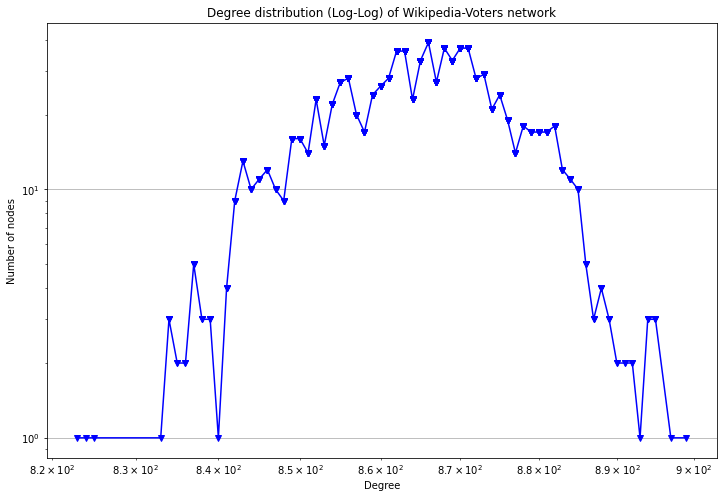

In [19]:
# print(deg)
degree_distribution_plotting(deg_triplet)

In [20]:
c_coeff = G_triplet.average_clustering()
print("clustering coefficient: ", c_coeff)

clustering coefficient:  0.86638


# References


[1] Erdős, Paul, and Alfréd Rényi. 1960. “On the Evolution of Random Graphs.” Bull. Inst. Internat. Statis. 38 (4): 343–47.

[2] M. E. J. Newman and D. J. Watts, Renormalization group analysis of the small-world network model, Physics Letters A, 263, 341, 1999. https://doi.org/10.1016/S0375-9601(99)00757-4

[3] NetworkX, “Software for Complex Networks,” https://networkx.github.io/documentation/stable/, 2020, accessed: 2020-10.

[4] NetworkX, “Install NetworkX Documentation,” https://networkx.github.io/documentation/stable/install.html, 2020, accessed: 2020-10.

[5] Graphs and Graph Algorithms, "Problem Solving with Algorithms and Data Structures using Python," http://www.openbookproject.net/books/pythonds/Graphs/Implementation.html, 2020, accessed: 2020-10.

[6] NetworkX, "erdos_renyi_graph," https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html, 2020, accessed: 2020-10.

[7] NetworkX, "newman_watts_strogatz_graph," https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.newman_watts_strogatz_graph.html, 2020, accessed: 2020-10.

[8] NetworkX, "gnm_random_graph," https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html, 2020, accessed: 2020-10.

[9] Wikipedia, "Clustering coefficient," https://en.wikipedia.org/wiki/Clustering_coefficient, 2020, accessed: 2020-10.